In [1]:
import numpy as np
from numpy import array
import math

import pandas as pd 
from pandas import DataFrame, concat

from datetime import datetime

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
import tensorflow.keras.layers as KL

import seaborn as sns

from matplotlib import pyplot

# Version 3

In [154]:
input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input2.csv', index_col = 0)
input_data.index.name = 'Timestamp (seconds)'
output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output2.csv', index_col = 0)
output_data.index.name = 'Timestamp (seconds)'
print(input_data.shape)

(30929, 34)


In [155]:
output_data2 = np.array(output_data)
# print(output_data2.shape)

Y = list()

for i in range((int(split_columns/2)),output_data2.shape[0], split_columns):
    Y.append(output_data2[i])

Y = array(Y)
# print(Y.shape)

#DECODING Y
# integer encode direction
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

df = input_data
df['Behavior'] = Y

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


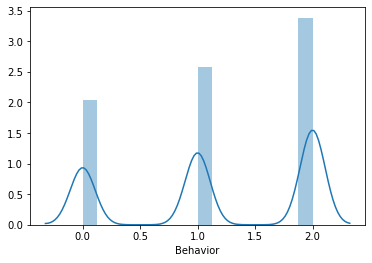

In [156]:
#Check output data distribution
sns.distplot(df['Behavior'])

In [157]:
numeric_feast = df.dtypes.index
print(numeric_feast)

Index(['Speed (km/h)', 'Latitude coordinate (degrees)',
       'Longitude coordinate (degrees)', 'Altitude (meters)',
       'Vertical accuracy (degrees)', 'Horizontal accuracy (degrees)',
       'Course (degrees)', 'Difcourse: course variation (degrees)',
       'Boolean of system activated (1 if >50km/h)', 'Acceleration in X (Gs)',
       'Acceleration in Y (Gs)', 'Acceleration in Z (Gs)',
       'Acceleration in X filtered by KF (Gs)',
       'Acceleration in Y filtered by KF (Gs)',
       'Acceleration in Z filtered by KF (Gs)', 'Roll (degrees)',
       'Pitch (degrees)', 'Yaw (degrees)',
       'X: car position relative to lane center (meters)',
       'Phi: car angle relative to lane curvature (degrees)',
       'W: road width (meters)',
       'State of the lane det. algorithm [-1=calibrating, 0=initializing, 1=undetected, 2=detected/running]',
       'Distance to ahead vehicle in current lane (meters) [value -1 means no car is detected in front]',
       'Time of impact to ahea

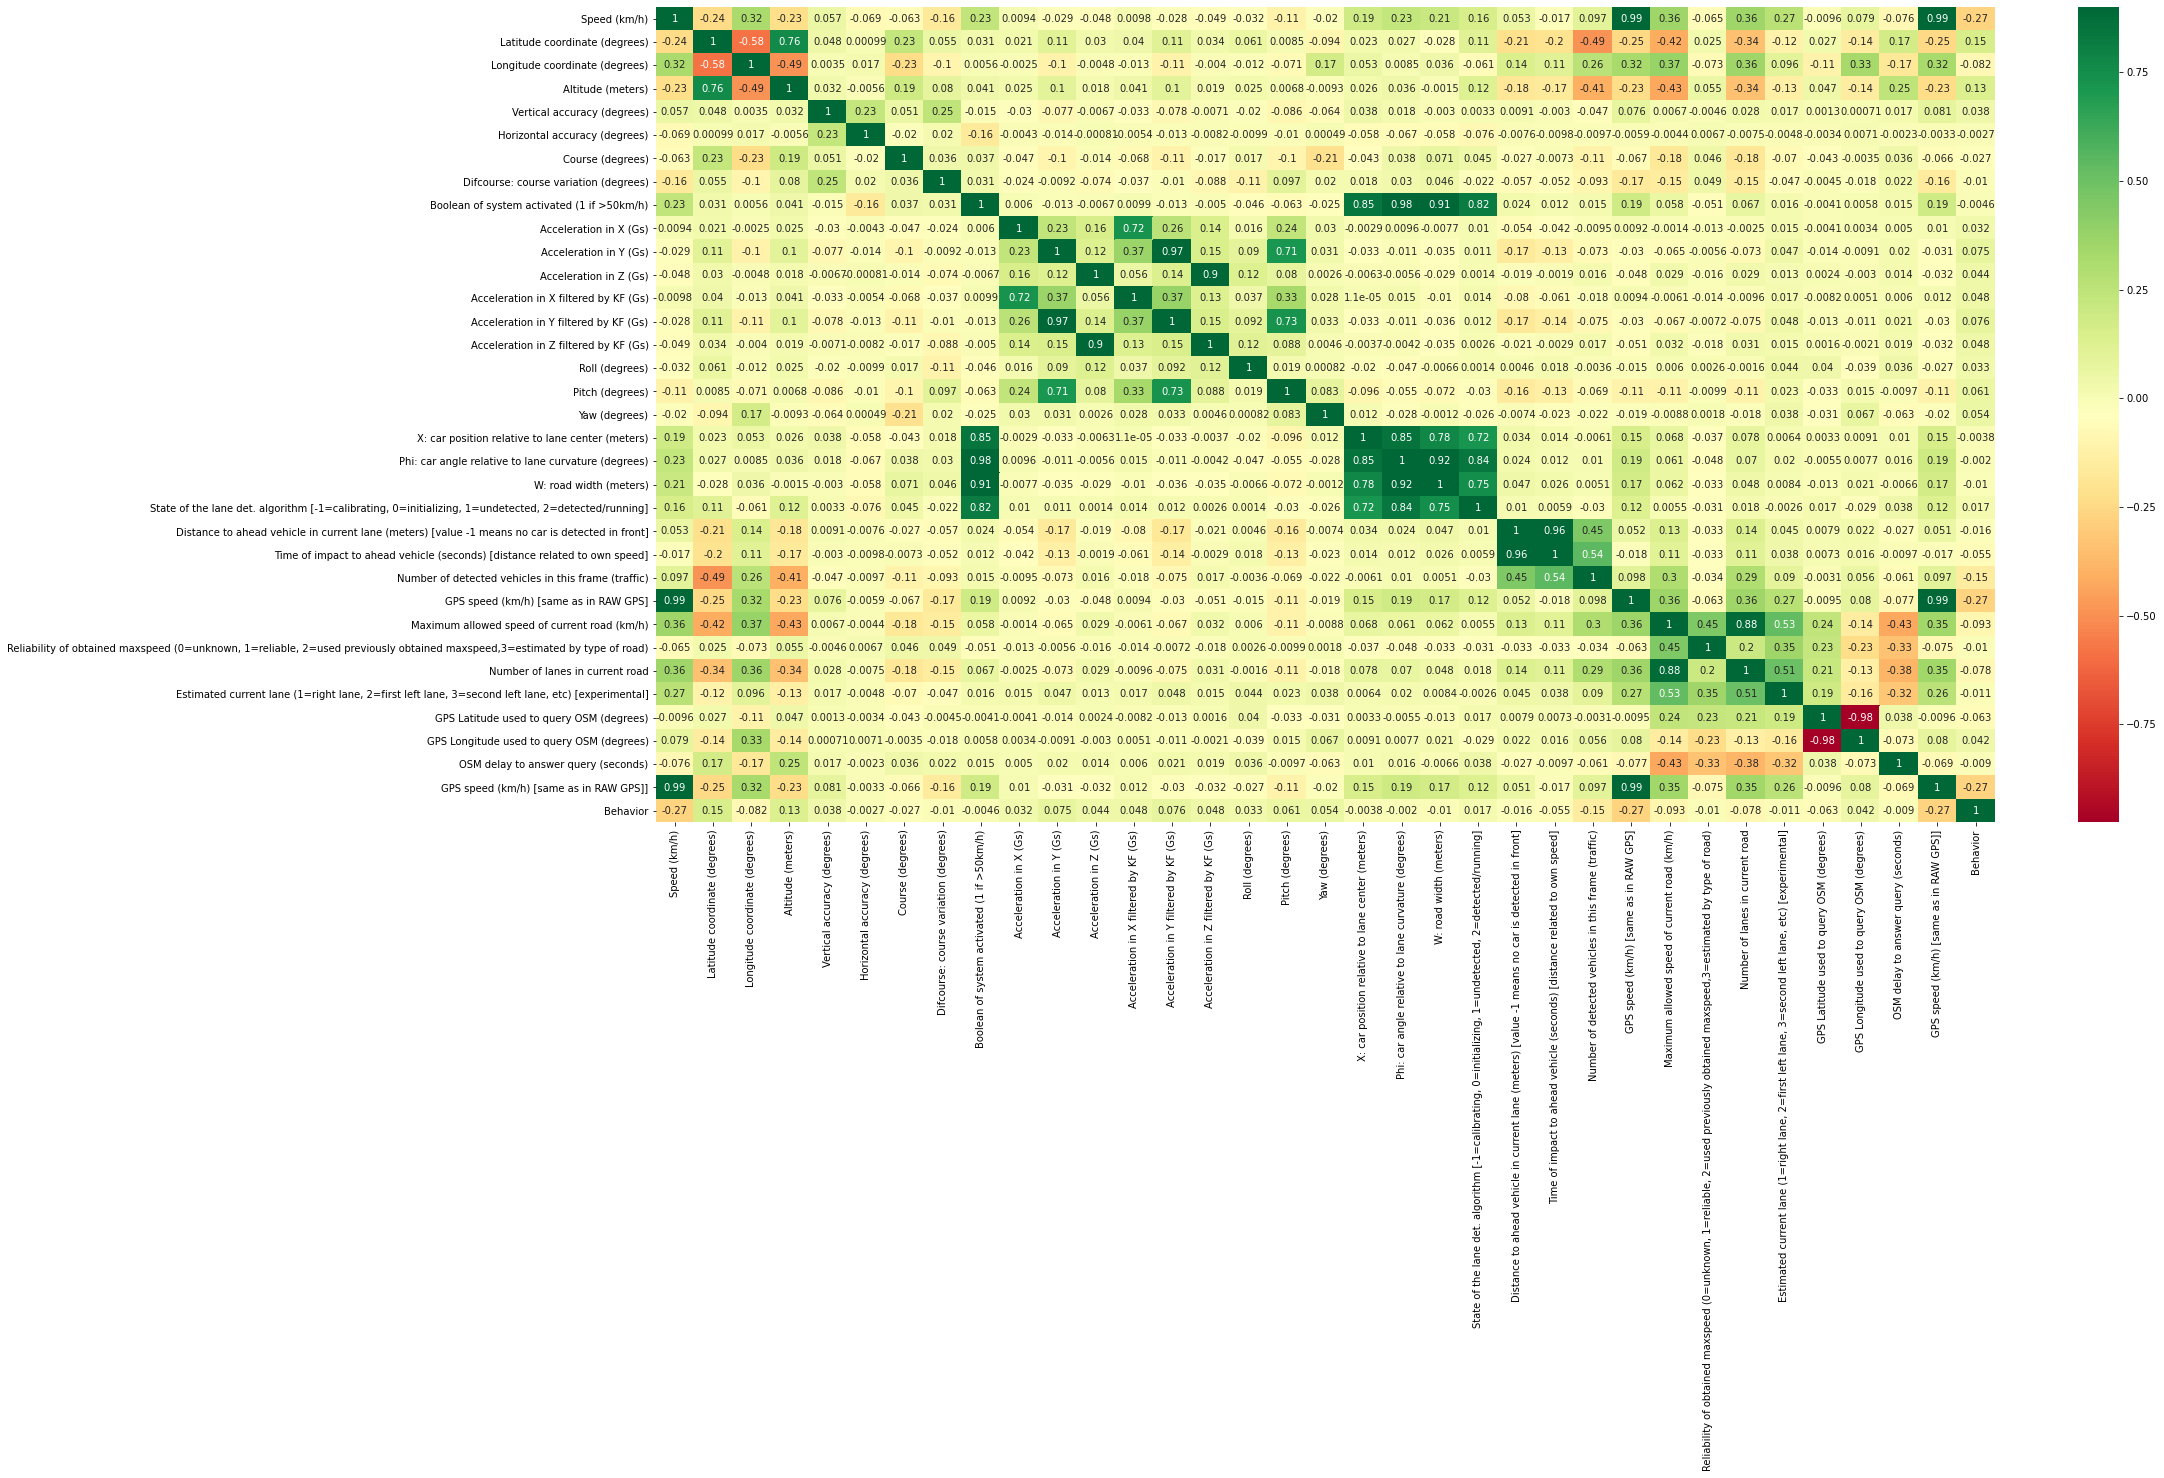

In [204]:
cormat = df[numeric_feast].corr()
pyplot.subplots(figsize = (30,15))
sns.heatmap(cormat, vmax=0.9, annot=True, cmap="RdYlGn")

# Feature Engineering

In [159]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [160]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)

In [161]:
df = pd.DataFrame(df)

In [162]:
df.columns = numeric_feast

In [163]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(df.iloc[:,:-1],df.iloc[:,-1:])

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.iloc[:,:-1].columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print 10 best features

                                                Specs        Score
25              GPS speed (km/h) [same as in RAW GPS]  2332.218188
33             GPS speed (km/h) [same as in RAW GPS]]  2325.362152
0                                        Speed (km/h)  2263.310540
6                                    Course (degrees)  1371.061478
1                       Latitude coordinate (degrees)   441.384305
24  Number of detected vehicles in this frame (tra...   357.878347
18   X: car position relative to lane center (meters)   343.873651
3                                   Altitude (meters)   331.824503
13              Acceleration in Y filtered by KF (Gs)   259.399792
10                             Acceleration in Y (Gs)   241.626546
17                                      Yaw (degrees)   176.296800
26       Maximum allowed speed of current road (km/h)   167.712374
16                                    Pitch (degrees)   158.179702
28                    Number of lanes in current road   145.21

C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<ipython-input-190-5bbb34ad0751>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(input_data.iloc[:,:-1],output_data)


[0.05482558 0.03880079 0.03098628 0.03875897 0.03532948 0.00019917
 0.07713235 0.01022453 0.00027205 0.0060317  0.01036545 0.00948999
 0.00676897 0.01118295 0.01169057 0.01922709 0.02093538 0.09359657
 0.04013068 0.01622007 0.04695859 0.00611177 0.03111383 0.04042244
 0.03091569 0.06647497 0.01508314 0.00618608 0.01541967 0.04158417
 0.03472292 0.03403538 0.02664263 0.07216011]


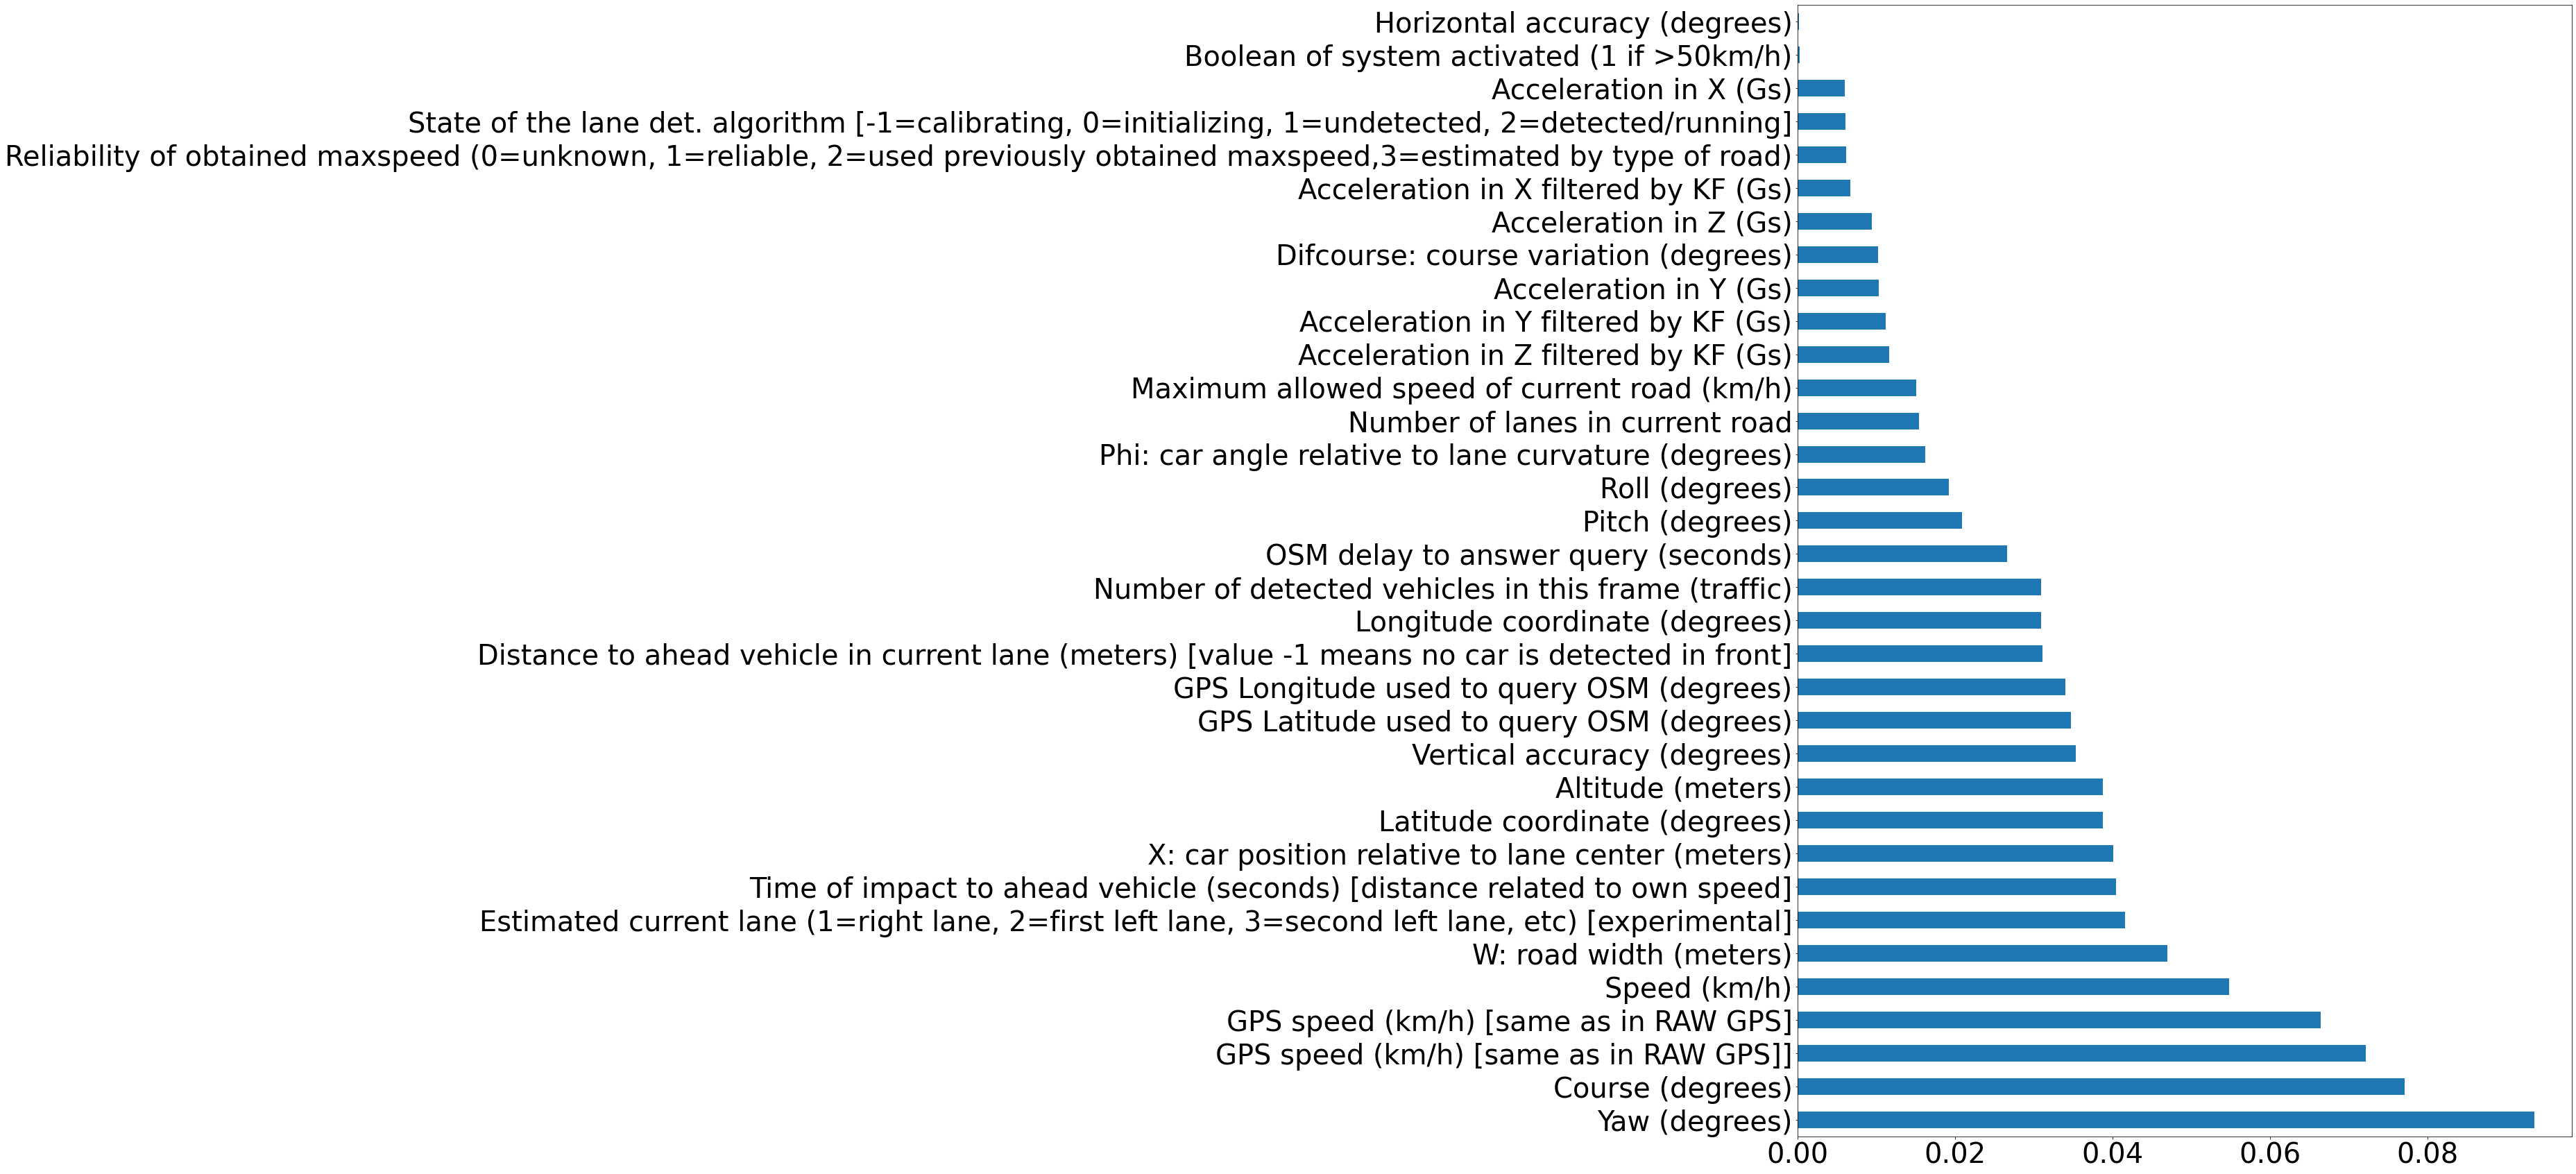

In [190]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(input_data.iloc[:,:-1],output_data)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=input_data.iloc[:,:-1].columns)
feat_importances.nlargest(100).plot(kind='barh',figsize= (20,30),fontsize = (40))

plt.show()

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")